# Problem Schedulingu

### Na podstawie podanych danych musimy dobrać optymalny grafik dla wszystkich pracowników tak, aby sumaryczna tygodniowa wypłata była jak najmniejsza

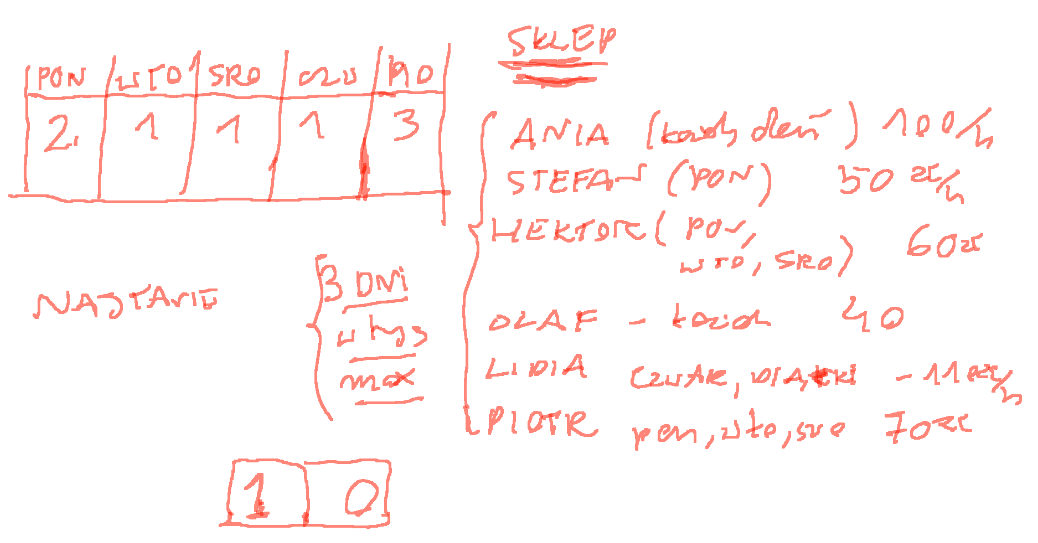

In [55]:
from pulp import *
import pandas as pd

pracownicy = ["Ania","Stefan","Hektor","Olaf","Lidia","Piotr"]
min_liczba_osob = {"Pon":2,"Wt":1,"Sro":1,"Czw":1,"Pt":3}
dni = ["Pon","Wt","Sro","Czw","Pt"]
stawki = {"Ania":100,"Stefan":50,"Hektor":60,"Olaf":40,"Lidia":11,"Piotr":70}
dostepnosc= {"Ania":["Pon","Wt","Sro","Czw","Pt"],"Stefan":["Pon"],"Hektor":["Pon","Wt","Sro"],"Olaf":["Pon","Wt","Sro","Czw","Pt"],"Lidia":["Czw","Pt"],"Piotr":["Pon","Wt","Sro"]}


x = LpVariable.dicts("x",(pracownicy, dni),upBound=1,lowBound=0)
prob = LpProblem("ProblemSchedulingu",LpMinimize)

prob += 4*lpSum(stawki[imie]*lpSum(x[imie][dzien] for dzien in dni) for imie in pracownicy)
for imie in pracownicy:
  k = 0
  for dzien in dni:
    if dzien not in dostepnosc[imie]:
      k += x[imie][dzien]  
  prob += k == 0

for dzien in dni:
  prob += lpSum(x[imie][dzien] for imie in pracownicy) >= min_liczba_osob[dzien]

for pracownik in pracownicy:
  prob += lpSum(x[pracownik][dzien] for dzien in dni) >= 1
  prob += lpSum(x[pracownik][dzien] for dzien in dni) <= 3

prob.writeLP("schedule.lp")
prob.solve()
print("Status:", LpStatus[prob.status], "\n")
print("Minimalne wypłaty na tydzień wynoszą:", value(prob.objective), "zł")

for imie in pracownicy:
    for dzien in dni:
        if(x[imie][dzien].varValue==1):
            print(imie,"pracuje w ",dzien)

Status: Optimal 

Minimalne wypłaty na tydzień wynoszą: 1528.0 zł
Ania pracuje w  Pt
Stefan pracuje w  Pon
Hektor pracuje w  Wt
Olaf pracuje w  Pon
Olaf pracuje w  Pt
Lidia pracuje w  Czw
Lidia pracuje w  Pt
Piotr pracuje w  Sro
